# Women's E-Commerce Clothing Reviews  
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## 1) Import and Cleaning Data

#### Import Librairies

In [10]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### Import Data

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

#### Head

In [3]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


#### Deleting useless column

In [4]:
del df["Unnamed: 0"]

#### Missing Value

In [5]:
df.drop( df[pd.isnull(df['Review Text'])].index , inplace=True)
df.drop( df[pd.isnull(df['Division Name'])].index , inplace=True)
df.drop( df[pd.isnull(df['Department Name'])].index , inplace=True)
df.drop( df[pd.isnull(df['Class Name'])].index , inplace=True)
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

We start with a small analysis of the dataset to see if we can fill the missing value based on other columns or simply delete them

In [6]:
df["Review Text"] = [str(x) for x in df["Review Text"]]

#### Data Analysis

##### How many piece are reviewed in this dataset

In [7]:
len(df["Clothing ID"].value_counts())

1172

##### The frequency of the rating

<AxesSubplot:ylabel='Rating'>

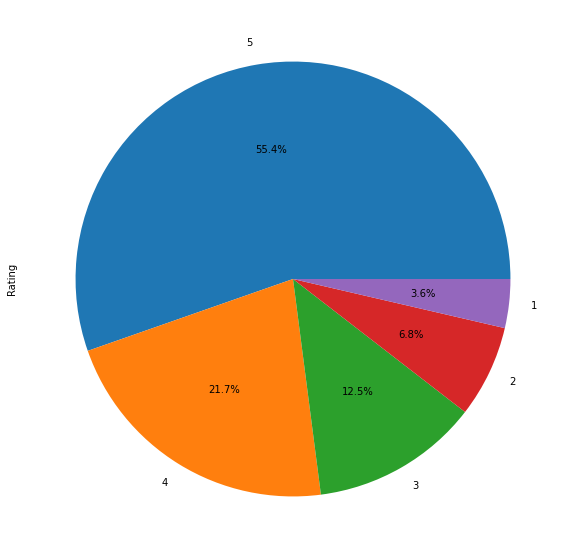

In [8]:
df["Rating"].value_counts().plot(kind = "pie", autopct='%1.1f%%',figsize=(16, 10))


We can easily conclude that more thant 75% of the products are reviewed as good 

### Sentiment Analysis

##### We start by defining 3 classes: positive, negative and neutral. Each of these is defined by a vocabulary:

In [11]:
l = []
for x in df["Review Text"] :
    for y in word_tokenize(x):
        l.append(y)
l = list(dict.fromkeys(l))
sid = SentimentIntensityAnalyzer()
positive_vocab=[]
negative_vocab=[]

for word in l:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        positive_vocab.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        negative_vocab.append(word)
           


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Adib/nltk_data'
    - 'C:\\Users\\Adib\\anaconda3\\nltk_data'
    - 'C:\\Users\\Adib\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Adib\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Adib\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


##### Every word is converted into a feature using a simplified bag of words model:

In [ ]:
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]

##### Our training set is then the sum of these three feature sets:

In [ ]:
train_set = negative_features + positive_features

##### We train the classifier:

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)

##### Some Prediction 

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
r = df["Review Text"][5]
r = r.lower()
words = r.split(' ')
neg = 0
pos = 0
for word in words:
    classResult = classifier.classify(word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))



##### We add two columns in the dataframe pos and neg

In [ ]:
pos_col = []
neg_col = []
for r in df["Review Text"]:
    r = r.lower()
    words = r.split(' ')
    neg = 0
    pos = 0
    for word in words:
        classResult = classifier.classify(word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1
    pos_col.append(float(pos)/len(words))
    neg_col.append(float(neg)/len(words))
df["Positive"] = pos_col
df["Negative"] = neg_col

In [ ]:
df.head(50)

In [ ]:
df["Negat"]